<a href="https://colab.research.google.com/github/Alexia-GROSS/ML_Movies-Popularity-Prediction/blob/master/ML_Alexia_Gross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project : Movie popularity prediction**

**Data Source**

* https://www.kaggle.com/hoangdang89/ticket-box-prediction
* https://github.com/busyML/Box-Office-Predictions/blob/master/Predicting_Film_Revenue_A_Soft_Intro_to_Neural_Networks.ipynb 

**Library Loading**

In [2]:
import numpy as np
import os, sys, sklearn
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import csv

**Data Loading**

In [3]:
#train_set = pd.read_csv('/content/train.csv', header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

train_set = pd.read_csv('/content/train.csv')
test_set = pd.read_csv('/content/test.csv')

train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5754,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2489,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.3000,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.1749,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.1481,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

## **Part 1 : Data Visualization**

___
Parameters
____

In [6]:
label_column = "budget"

info = train_set[label_column].copy()
info.describe()

count         3,000.0000
mean     22,531,334.1100
std      37,026,086.4120
min               0.0000
25%               0.0000
50%       8,000,000.0000
75%      29,000,000.0000
max     380,000,000.0000
Name: budget, dtype: float64

In [7]:
label_column = "popularity"

info = train_set[label_column].copy()
info.describe()

count   3,000.0000
mean        8.4633
std        12.1040
min         0.0000
25%         4.0181
50%         7.3749
75%        10.8910
max       294.3370
Name: popularity, dtype: float64

In [8]:
label_column = "runtime"

info = train_set[label_column].copy()
info.describe()

count   2,998.0000
mean      107.8566
std        22.0864
min         0.0000
25%        94.0000
50%       104.0000
75%       118.0000
max       338.0000
Name: runtime, dtype: float64

In [9]:
label_column = "revenue"

info = train_set[label_column].copy()
info.describe()

count           3,000.0000
mean       66,725,851.8887
std       137,532,326.3360
min                 1.0000
25%         2,379,808.2500
50%        16,807,068.0000
75%        68,919,203.5000
max     1,519,557,910.0000
Name: revenue, dtype: float64

___
Histograms
___

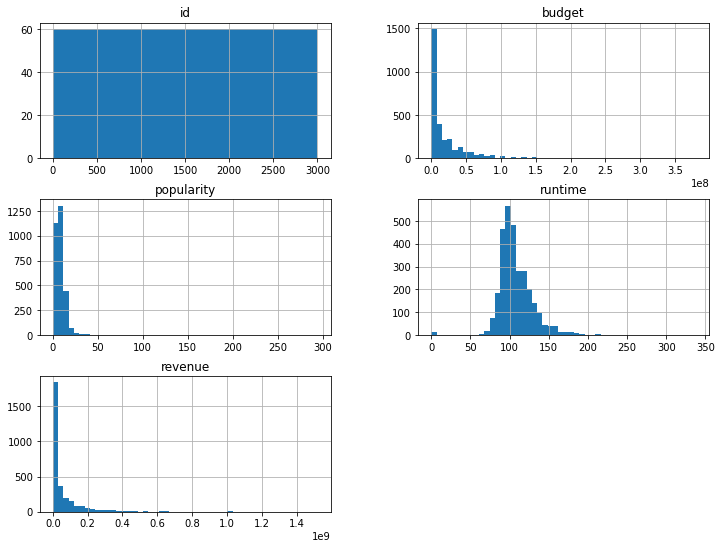

In [10]:
# plot histogram for all columns
train_set.hist(bins=50, figsize=(12,9)) # bins is number of groups of values
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


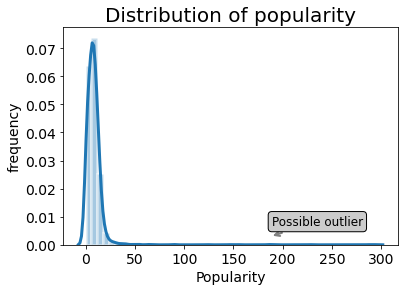

In [11]:
# histogram and kernel density estimation function of the variable popularity

label_column = "popularity"
info = train_set[label_column].copy()

ax = sns.distplot(info, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of popularity', fontsize=20);

sns.set(rc={'figure.figsize':(10,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


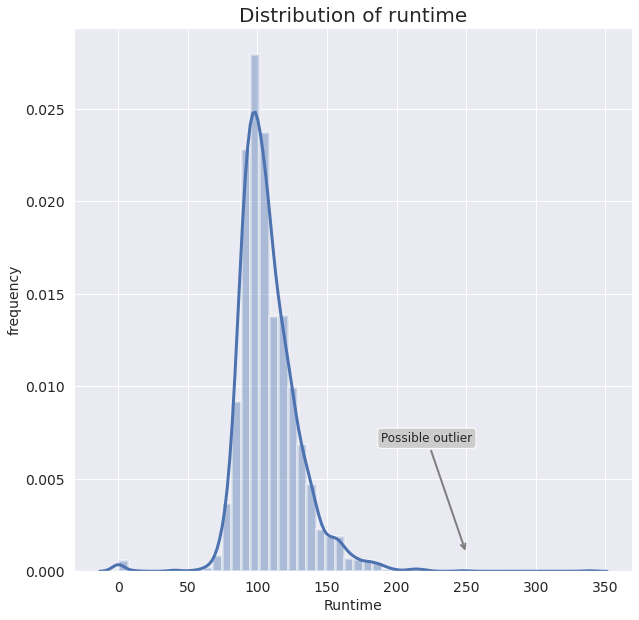

In [12]:
label_column = "runtime"
info = train_set[label_column].copy()

ax = sns.distplot(info, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
ax.annotate('Possible outlier', xy=(250,0.0010), xytext=(189,0.0070), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of runtime', fontsize=20);

sns.set(rc={'figure.figsize':(10,10)})

___
Box plots
___

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


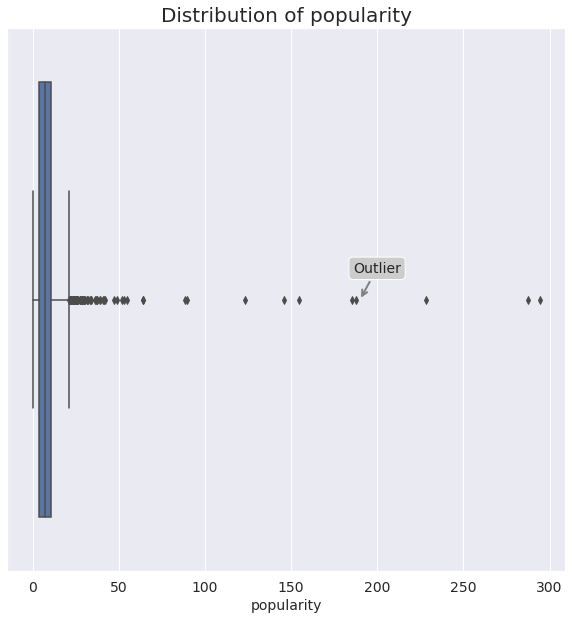

In [13]:
# box plot of the variable popularity

label_column = "popularity"
info = train_set[label_column].copy()

ax = sns.boxplot(info)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('popularity', fontsize=14)
plt.title('Distribution of popularity', fontsize=20)

sns.set(rc={'figure.figsize':(20,20)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


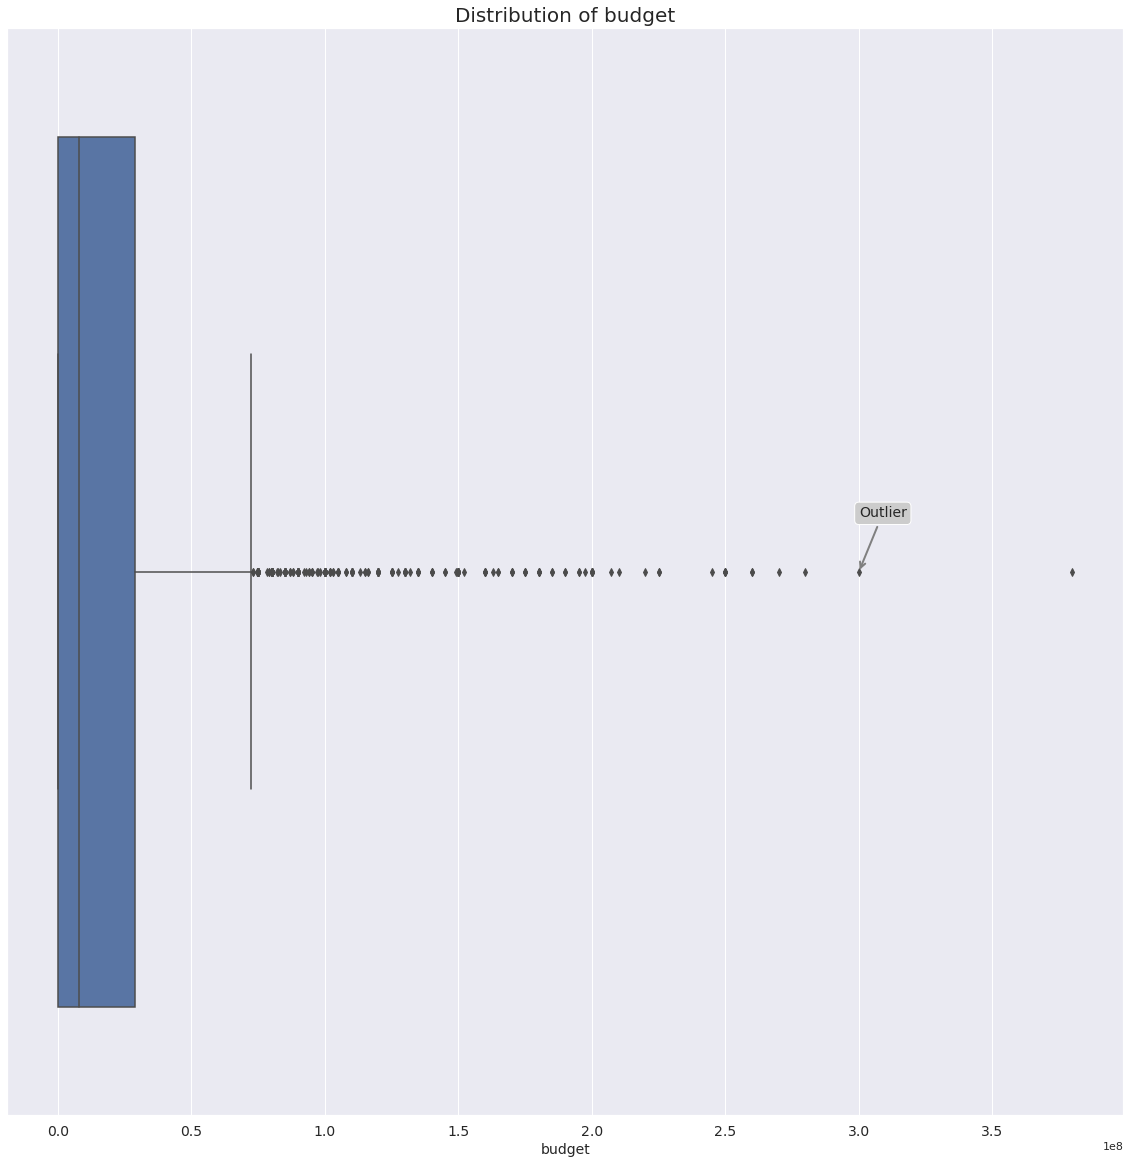

In [14]:
# box plot of the variable budget

label_column = "budget"
info = train_set[label_column].copy()

ax = sns.boxplot(info)

# notation indicating an outlier
ax.annotate('Outlier', xy=(300000000,0), xytext=(300000000,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('budget', fontsize=14)
plt.title('Distribution of budget', fontsize=20)

sns.set(rc={'figure.figsize':(10,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


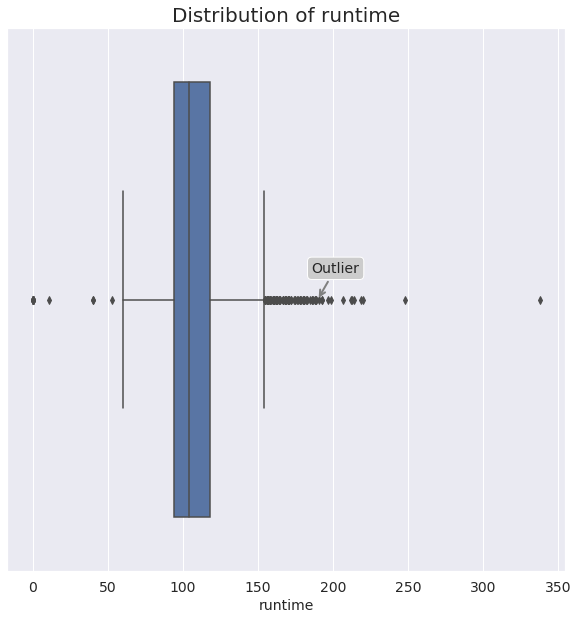

In [15]:
# box plot of the variable runtime

label_column = "runtime"
info = train_set[label_column].copy()

ax = sns.boxplot(info)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('runtime', fontsize=14)
plt.title('Distribution of runtime', fontsize=20)

sns.set(rc={'figure.figsize':(10,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


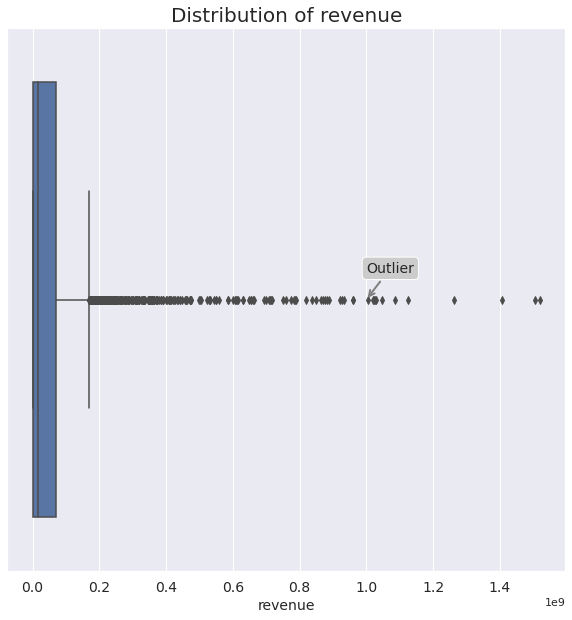

In [16]:
# box plot of the variable revenue

label_column = "revenue"
info = train_set[label_column].copy()

ax = sns.boxplot(info)

# notation indicating an outlier
ax.annotate('Outlier', xy=(1e9,0), xytext=(1e9,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('revenue', fontsize=14)
plt.title('Distribution of revenue', fontsize=20)

sns.set(rc={'figure.figsize':(10,10)})

In [17]:
df = train_set
Q1 = train_set.quantile(0.25)
Q3 = train_set.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Keywords                   0
belongs_to_collection      0
budget                   249
cast                       0
crew                       0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                70
poster_path                0
production_companies       0
production_countries       0
release_date               0
revenue                  315
runtime                  126
spoken_languages           0
status                     0
tagline                    0
title                      0
dtype: int64

___
Correlation
___

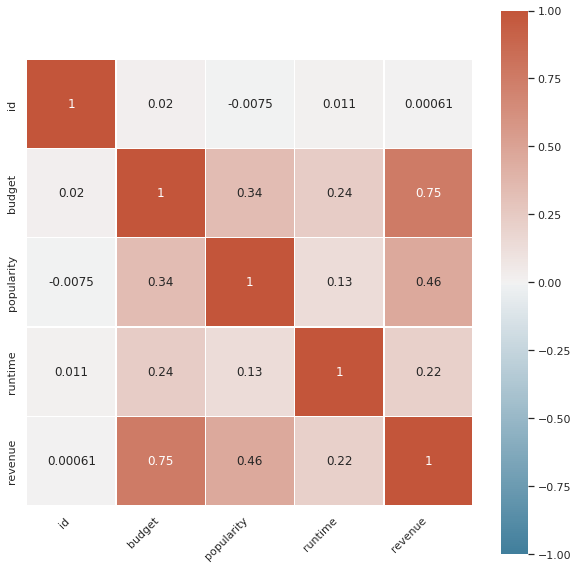

In [18]:

corr = train_set.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    square=True,
    annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can observe that the "Budget" is highly corrolated with the "revenue". On the contrary, the "Popularity" is not corrolated with the "Runtime".

___
Analysis
___

In [19]:
most_popular_movies = train_set.sort_values('popularity', ascending=False).head(n=20)
most_popular_movies['revenue(million)'] = most_popular_movies['revenue'].apply(lambda x : x//1000000)
most_popular_movies['budget(million)'] = most_popular_movies['budget'].apply(lambda x : x//1000000)

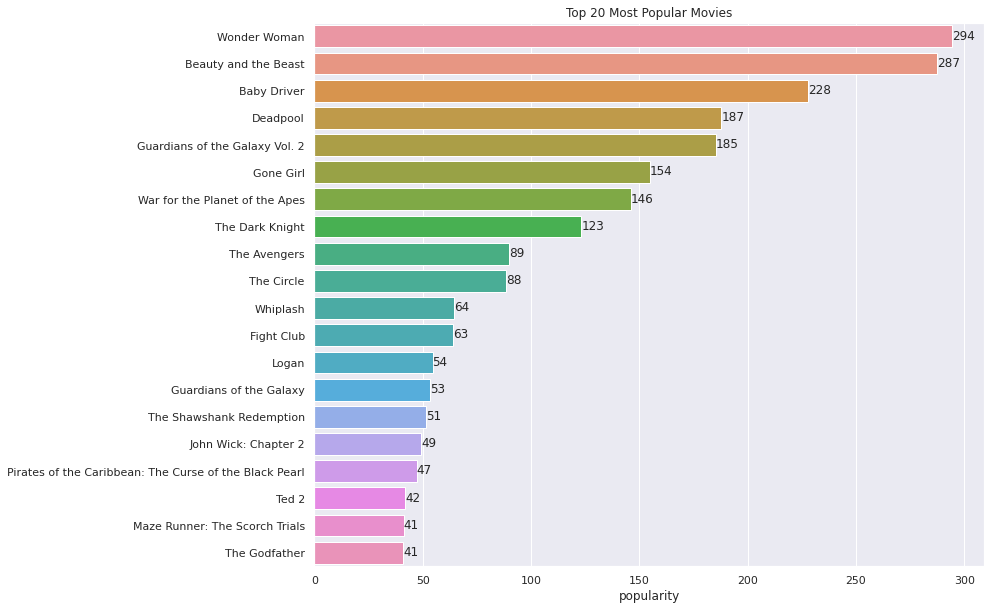

In [20]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=most_popular_movies, order=most_popular_movies.sort_values('popularity', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

In [21]:
label_column = "popularity"

info = train_set[label_column].copy()
info.describe()


count   3,000.0000
mean        8.4633
std        12.1040
min         0.0000
25%         4.0181
50%         7.3749
75%        10.8910
max       294.3370
Name: popularity, dtype: float64

In [22]:
train_set['popularity'] = train_set['popularity'].mask(train_set['popularity'] >= 40, 40)



In [23]:
most_popular_movies = train_set.sort_values('popularity', ascending=False).head(n=20)
most_popular_movies['revenue(million)'] = most_popular_movies['revenue'].apply(lambda x : x//1000000)
most_popular_movies['budget(million)'] = most_popular_movies['budget'].apply(lambda x : x//1000000)

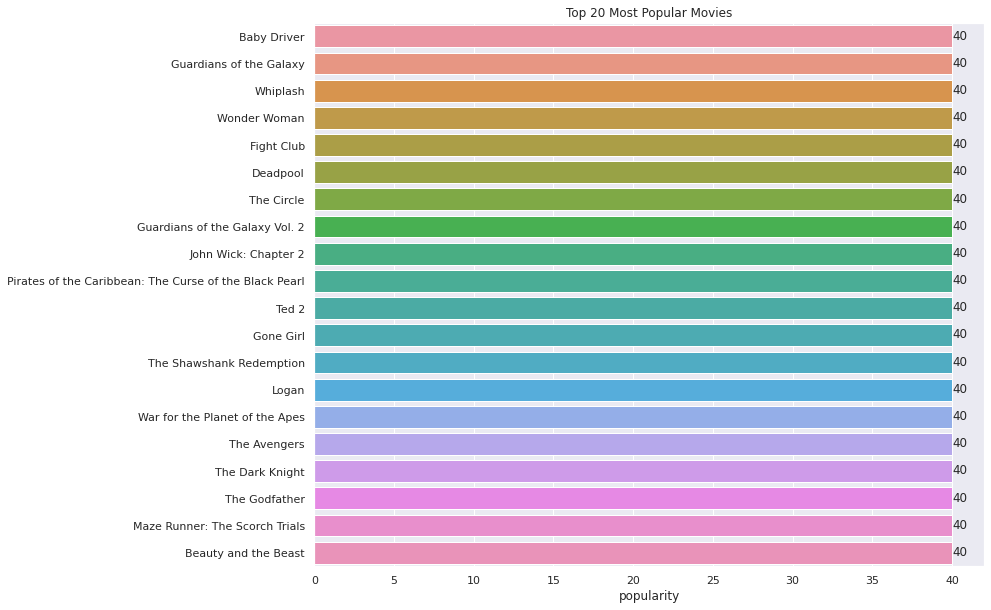

In [24]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=most_popular_movies, order=most_popular_movies.sort_values('popularity', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

In [25]:
label_column = "popularity"

info = train_set[label_column].copy()
info.describe()


count   3,000.0000
mean        7.9653
std         5.8379
min         0.0000
25%         4.0181
50%         7.3749
75%        10.8910
max        40.0000
Name: popularity, dtype: float64

___
**Dataset Creation**
___

In [26]:
SPLITTER = " "
COLUMN_EXCLUDE_PATTERN = "id|popularity|belongs_to_collection|homepage|tagline|revenue"

TEXT_FIELDS =[  ("genres", "name"), 
                ("production_companies", "id"),                
                ("production_countries", "iso_3166_1"),
                ("spoken_languages", "name"),
                ("Keywords", "name"),
                ("cast", "name"),                         
                ("crew", "name"),              
             ]

TEXT_FIELDS2 =[ ("production_companies", "name"),
                ("cast", "character"),  
                ("cast", "job"),  
                ("cast", "profile_path"),
                ("crew", "job"),
                ("crew", "department"),
             ]

In [27]:
label_column = "popularity"
X_train = train_set.copy().drop(train_set.filter(regex=COLUMN_EXCLUDE_PATTERN), axis=1)
y_train = train_set[label_column].copy()

In [28]:
X_train.shape

(3000, 16)

## **Part 2 : Pre-treatment of the data**

Visualization of the following attributes : budget, original title, popularity and original language

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class LimitedColumnsFilter(BaseEstimator, TransformerMixin):
    def __init__(self, filters):
        self.filters = filters   

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):        
        return X.copy().filter(items=self.filters)

filters = ('budget', 'original_title','revenue', 'original_language')
result = LimitedColumnsFilter(filters).transform(X_train)
result.head()

,budget,original_title,original_language
0,14000000,Hot Tub Time Machine 2,en
1,40000000,The Princess Diaries 2: Royal Engagement,en
2,3300000,Whiplash,en
3,1200000,Kahaani,hi
4,0,마린보이,ko


In [30]:
result

,budget,original_title,original_language
0,14000000,Hot Tub Time Machine 2,en
1,40000000,The Princess Diaries 2: Royal Engagement,en
2,3300000,Whiplash,en
3,1200000,Kahaani,hi
4,0,마린보이,ko
...,...,...,...
2995,0,Chasers,en
2996,0,Vi är bäst!,sv
2997,65000000,The Long Kiss Goodnight,en
2998,42000000,Along Came Polly,en


We convert the dates from "2/20/15" to "2015-02-20" in order to be used in our model.

In [31]:
class DateTimeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, replace=True):
        self.replace = replace
        pass

    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        clone_X = X.copy()                            
        for feature in X.select_dtypes(include=[np.object]).columns:
            try:
                clone_X[feature] = pd.to_datetime(X[feature], infer_datetime_format=True)
            except:
                pass
        return clone_X

result = DateTimeImputer().transform(X_train)
filters = list(X_train.filter(like="date").columns)
result[filters].head()

,release_date
0,2015-02-20
1,2004-08-06
2,2014-10-10
3,2012-03-09
4,2009-02-05


We transform the date from "2015-02-20" to three variables : y=2015, m=02, d=20

In [32]:
class DateDissolver(BaseEstimator, TransformerMixin):
    def __init__(self, replace=False): # no *args or **kargs
        self.replace = replace
        pass

    def fit(self, X, y=None):
        return self  

    def transform(self, X, y=None):
        clone_X = X.copy()
        for feature in X.select_dtypes(include=[np.datetime64]).columns:
            if self.replace:
                clone_X = clone_X.drop([feature], axis=1)                  
            try:        
                clone_X['{0}_Y'.format(feature)] = X[feature].dt.year
                clone_X['{0}_M'.format(feature)] = X[feature].dt.month
                clone_X['{0}_D'.format(feature)] = X[feature].dt.day
            except:
                pass
        return clone_X

result = DateTimeImputer().transform(X_train)
result = DateDissolver(replace=True).transform(result)
filters = list(result.filter(like="date").columns)
result[filters].head()

,release_date_Y,release_date_M,release_date_D
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


Visualization of the following variables: budget, popularity and duration.

In [33]:
class NumberFilter(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):      
        return X.copy().select_dtypes(include=[np.int64, np.float64])        

result = NumberFilter().transform(X_train)
result.head()

,budget,runtime
0,14000000,93.0000
1,40000000,113.0000
2,3300000,105.0000
3,1200000,122.0000
4,0,118.0000


List of variables : result.columns

In [34]:
class CategoryFilter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):        
        return X.copy().select_dtypes(include=[np.object])        

result = CategoryFilter().transform(X_train)
result.columns

Index(['genres', 'original_language', 'original_title', 'overview',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'title', 'Keywords',
       'cast', 'crew'],
      dtype='object')

Traitment of the other variables: belongs_to_collection, genres, production_companies, production_countries, spoken_languages, cast, crew, keywords

In [35]:
import ast

class InfoExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, field, replace=False):
        self.field = field
        self.replace = replace

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        clone_X = X.copy()   
        for feature, field_name in self.field:
            if self.replace:
                clone_X[feature] = X[feature].apply(lambda x: self.extract_field(x, field_name))
            else:
                clone_X["{0}_{1}".format(feature, field_name)] = X[feature].apply(lambda x: self.extract_field(x, field_name))
        return clone_X
        
    def extract_field(self, data, field_name):
        if(data is not np.nan):
            info = ast.literal_eval(data)            
            result = SPLITTER.join("{}".format(x[field_name]).replace(SPLITTER, "_") for x in info)
            return result
        return np.nan
    
infoExtractor = InfoExtractor(field=TEXT_FIELDS, replace=True)
result = infoExtractor.transform(X_train)
filters = list(result.filter(regex="cast|production|genres|languages|Keywords|crew").columns)
result[filters].head()


,genres,production_companies,production_countries,spoken_languages,Keywords,cast,crew
0,Comedy,4 60 8411,US,English,time_travel sequel hot_tub duringcreditsstinger,Rob_Corddry Craig_Robinson Clark_Duke Adam_Sco...,Kelly_Cantley Steve_Pink Josh_Heald Josh_Heald...
1,Comedy Drama Family Romance,2,US,English,coronation duty marriage falling_in_love,Anne_Hathaway Julie_Andrews H√©ctor_Elizondo J...,Garry_Marshall Charles_Minsky John_Debney Whit...
2,Drama,2266 3172 32157,US,English,jazz obsession conservatory music_teacher new_...,Miles_Teller J.K._Simmons Melissa_Benoist Aust...,Terri_Taylor Richard_Henderson Jeffrey_Stott H...
3,Thriller Drama,NaN,IN,English हिन्दी,mystery bollywood police_corruption crime indi...,Vidya_Balan Nawazuddin_Siddiqui Parambrata_Cha...,Sujoy_Ghosh Sujoy_Ghosh Sujoy_Ghosh
4,Action Thriller,NaN,KR,한국어/조선말,NaN,Kim_Kang-woo Jo_Jae-hyeon Park_Si-yeon Kim_Joo...,Jong-seok_Yoon Jong-seok_Yoon


Changement of the "Null" variables.

In [36]:
from keras.preprocessing.text import Tokenizer

class TextEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, field=None, replace=False):
        self.field = field
        self.replace = replace

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        clone_X = X.copy()
        if self.field is None:
            self.field = X.copy().select_dtypes(include=[np.object], exclude=[np.datetime64]).columns               
        for feature in self.field:               
            if self.replace:               
                clone_X[feature] = pd.Series(data=self.encode_textBySum(X[feature]), index=clone_X.index)
            else:                
                clone_X["{0}_{1}".format(feature, 'count')] = pd.Series(data=self.encode_textBySum(X[feature]), index=clone_X.index)
        return clone_X
        
    def encode_textBySum(self, df_feature):
        tokenizer = Tokenizer()
        clone_feature = df_feature.copy().fillna('')        
        tokenizer.fit_on_texts(clone_feature)
       
        encoded_docs = tokenizer.texts_to_matrix(clone_feature, mode='tfidf')
        encoded_nums = np.sum(encoded_docs,axis=1)
        return encoded_nums
    
    def encode_textForOneHot(self, df_feature):
        tokenizer = Tokenizer()
        clone_feature = df_feature.copy().fillna('')        
        tokenizer.fit_on_texts(clone_feature)
        encoded_docs = tokenizer.texts_to_matrix(clone_feature, mode='binary')        
        encoded_onehot = pd.DataFrame(data=encoded_docs).applymap("{:1.0f}".format).apply("".join, axis=1)                      
        return encoded_onehot


infoExtractor = InfoExtractor(field=[("cast", "name")], replace=True)                
textEncoder = TextEncoder(field=["cast"], replace=True)
result = infoExtractor.transform(X_train)
result = textEncoder.transform(result)
filters = list(result.filter(regex="date|cast").columns)
result[filters].head()

,release_date,cast
0,2/20/15,233.3424
1,8/6/04,192.8608
2,10/10/14,565.7832
3,3/9/12,92.8054
4,2/5/09,61.5024


___
**Pipelines Transformation**
___

Data used for our model.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


text_pipeline = Pipeline([        
        ('inf_extor'   , InfoExtractor(field=TEXT_FIELDS, replace=True)),
        ('txt_encoder' , TextEncoder(replace=True)),
    ])

result = DateTimeImputer().transform(X_train)
result = DateDissolver(replace=True).transform(result)
result = text_pipeline.fit_transform(result)
result.head()


,budget,genres,original_language,original_title,overview,poster_path,production_companies,production_countries,runtime,spoken_languages,status,title,Keywords,cast,crew,release_date_Y,release_date_M,release_date_D
0,14000000,1.3649,0.7722,29.7698,86.2111,8.0070,10.7776,0.8390,93.0000,0.7634,0.6936,29.5467,27.5602,233.3424,724.6678,2015,2,20
1,40000000,6.8065,0.7722,32.2026,232.2292,8.0070,3.8840,0.8390,113.0000,0.7634,0.6936,31.5978,29.8190,192.8608,86.3571,2004,8,6
2,3300000,1.0846,0.7722,7.3139,75.4125,8.0070,17.8654,0.8390,105.0000,0.7634,0.6936,7.3139,90.1565,565.7832,612.9589,2014,10,10
3,1200000,2.6527,4.2594,7.3139,318.5386,8.0070,0.0000,3.6266,122.0000,4.7455,0.6936,7.3139,50.7610,92.8054,29.8478,2012,3,9
4,0,3.1861,4.9688,7.3139,99.7664,8.0070,0.0000,4.8785,118.0000,8.7627,0.6936,12.3545,0.0000,61.5024,30.5540,2009,2,5


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([        
        ('num_filter', NumberFilter()),
        ('imputer'   , SimpleImputer(strategy="median")),     # fill nan/empty cells        
        ('mm_scaler' , MinMaxScaler(feature_range=(-1, 1))),  # feature scaling
    ])

result = num_pipeline.fit_transform(X_train)
pd.DataFrame(data=result).describe()

,0,1
count,"3,000.0000","3,000.0000"
mean,-0.8814,-0.3618
std,0.1949,0.1306
min,-1.0000,-1.0000
25%,-1.0000,-0.4438
50%,-0.9579,-0.3846
75%,-0.8474,-0.3018
max,1.0000,1.0000


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

cat_pipeline = Pipeline([
        ('cat_filter', CategoryFilter()),
        ('imputer'   , SimpleImputer(strategy='constant', fill_value='Missing')),  # fill nan/empty cells
    ])

filters = ('budget', 'original_language')
result = LimitedColumnsFilter(filters).transform(X_train)
result = cat_pipeline.fit_transform(result)
result[0]


array(['en'], dtype=object)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


full_pipeline = make_column_transformer(              
    (num_pipeline , make_column_selector(dtype_include=[np.int64, np.float64])),            
)


filters = list(X_train.filter(regex="date|budget|original_language").columns)
result = LimitedColumnsFilter(filters).transform(X_train)
result = full_pipeline.fit_transform(result)



## **Part 3 : Model creation**

### **First model**

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras import Model
from keras.layers import Dropout

In [ ]:
X_train_pp_df = DateTimeImputer().transform(X_train)
X_train_pp_df = DateDissolver(replace=True).transform(X_train_pp_df)
X_train_pp_df = text_pipeline.fit_transform(X_train_pp_df)

X_train_pp = full_pipeline.fit_transform(X_train_pp_df)

In [ ]:
model_1 = tf.keras.Sequential()

model_1.add(Dense(16, input_dim=18, activation='relu'))
model_1.add(Dropout(0.6))
model_1.add(Dense(8, activation='relu'))

# No need to modify the code under this
model_1.add(Dense(1, activation = 'linear'))
model_1.summary()

# Compile the model
model_1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


print(X_train_pp.shape)
print(y_train.shape)
history = model_1.fit(X_train_pp, y_train, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                304       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
(3000, 18)
(3000,)
Epoch 1/100
75/75 [==============================] - 1s 5ms/step - loss: 88.5320 - accuracy: 0.0000e+00 - val_loss: 62.7356 - val_accuracy: 0.0000e+00
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 52.6440 - a

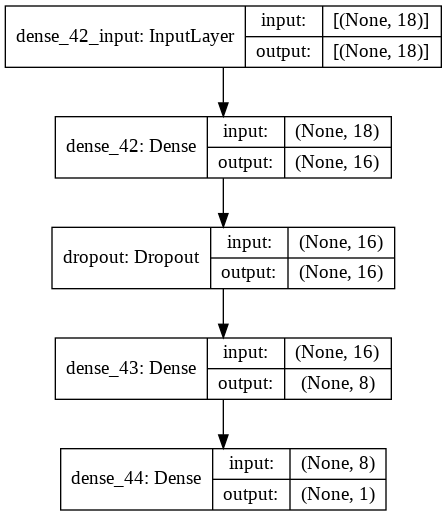

In [ ]:
keras.utils.plot_model(model_1, show_shapes=True)

### **Second Model**

In [ ]:
X_train_pp_df = DateTimeImputer().transform(X_train)
X_train_pp_df = DateDissolver(replace=True).transform(X_train_pp_df)
X_train_pp_df = text_pipeline.fit_transform(X_train_pp_df)

X_train_pp = full_pipeline.fit_transform(X_train_pp_df)

In [ ]:
 model_2 = keras.models.Sequential([
      keras.layers.Dense(72, input_shape=(18,), activation="relu"),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(128, activation="relu"),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(256, activation="relu"),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(128, activation="relu"),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(72, activation="relu"),
      keras.layers.Dropout(0.6),
      keras.layers.Dense(6)
    ])

model_2.summary()

# Compile the model
model_2.compile(loss='mse', optimizer='adam')

print(X_train_pp.shape)
print(y_train.shape)
history = model_2.fit(X_train_pp, y_train, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 72)                1368      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               9344      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)              

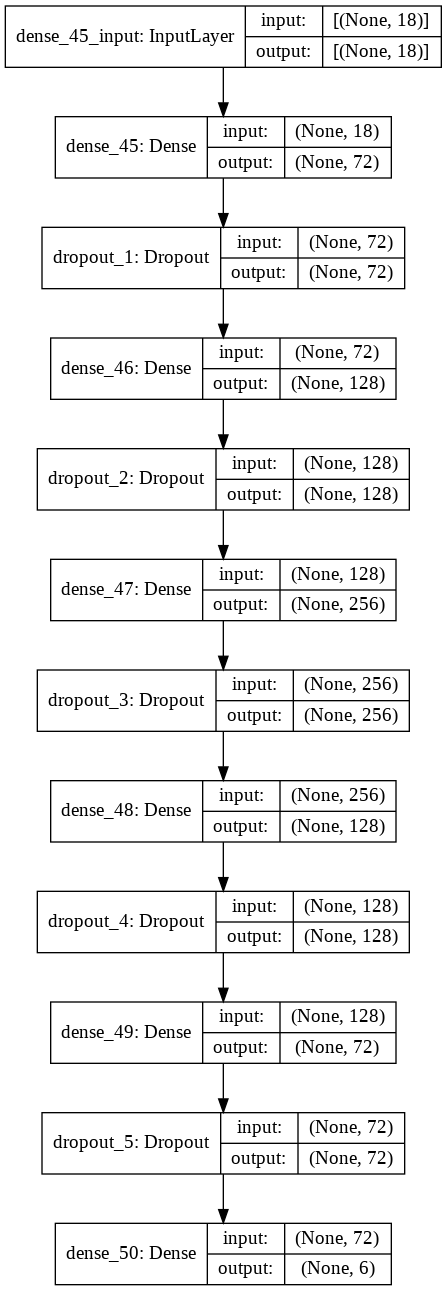

In [ ]:
keras.utils.plot_model(model_2, show_shapes=True)

### **Thrid Model**

In [ ]:
 X_train_pp_df = DateTimeImputer().transform(X_train)
X_train_pp_df = DateDissolver(replace=True).transform(X_train_pp_df)
X_train_pp_df = text_pipeline.fit_transform(X_train_pp_df)

X_train_pp = full_pipeline.fit_transform(X_train_pp_df)

In [ ]:
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Dense(5000 , activation="relu", input_shape=X_train_pp.shape[1:]))
model_3.add(keras.layers.Dense(1000, activation="relu"))
model_3.add(keras.layers.Dense(2000, activation="relu"))
model_3.add(keras.layers.Dense(100, activation="relu"))
model_3.add(keras.layers.Dense(500, activation="relu"))
model_3.add(keras.layers.Dense(X_train_pp.shape[1], activation="relu"))
model_3.add(keras.layers.Dense(1))

model_3.compile(loss="mean_squared_logarithmic_error", optimizer=keras.optimizers.SGD(lr=1e-1))
history = model_3.fit(X_train_pp, y_train, epochs=100, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
75/75 [==============================] - 1s 10ms/step - loss: 0.6355 - val_loss: 0.4545
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.4512 - val_loss: 0.4471
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.4019 - val_loss: 0.3576
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3998 - val_loss: 0.5483
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3996 - val_loss: 0.3388
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3820 - val_loss: 0.3297
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3543 - val_loss: 0.3236
Epoch 8/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3562 - val_loss: 0.3298
Epoch 9/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3627 - val_loss: 0.3287
Epoch 10/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3530 - val_loss: 0.3131
Epoch 11

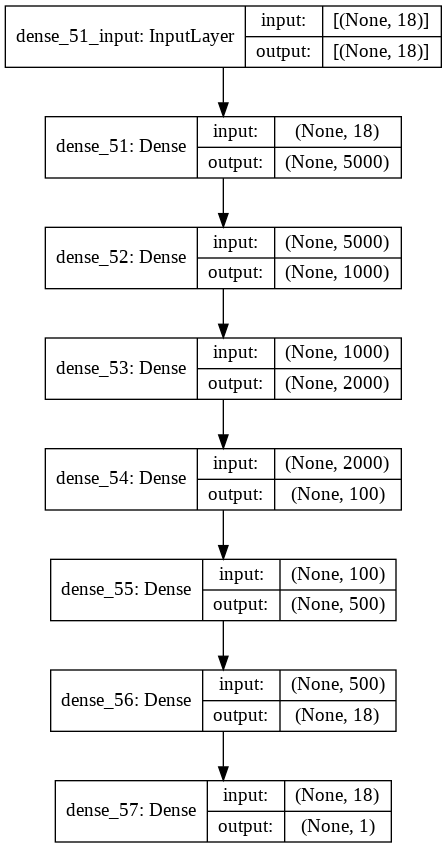

In [ ]:
 keras.utils.plot_model(model_3, show_shapes=True)

## **Part 4 : Prediction with the test_set**

In [ ]:
X_test = test_set.copy().drop(test_set.filter(regex=COLUMN_EXCLUDE_PATTERN), axis=1)
print(X_test.info())
X_test_pp_df = DateTimeImputer().transform(X_test)
X_test_pp_df = DateDissolver(replace=True).transform(X_test_pp_df)
X_test_pp_df = text_pipeline.fit_transform(X_test_pp_df)
print(X_test_pp_df.info())

X_test_pp = full_pipeline.transform(X_test_pp_df)
X_test_pp[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4398 non-null   int64  
 1   genres                4382 non-null   object 
 2   original_language     4398 non-null   object 
 3   original_title        4398 non-null   object 
 4   overview              4384 non-null   object 
 5   poster_path           4397 non-null   object 
 6   production_companies  4140 non-null   object 
 7   production_countries  4296 non-null   object 
 8   release_date          4397 non-null   object 
 9   runtime               4394 non-null   float64
 10  spoken_languages      4356 non-null   object 
 11  status                4396 non-null   object 
 12  title                 4395 non-null   object 
 13  Keywords              4005 non-null   object 
 14  cast                  4385 non-null   object 
 15  crew                 

array([-1.        , -0.12408246,  0.11283519, -0.92727275, -0.54887856,
        1.09549749, -1.        , -0.72091026, -0.46745562, -0.74620407,
       -0.99985613, -0.35059355, -0.95972814, -0.92252835, -0.97308113,
       -0.27272727,  0.09090909, -0.13333333])

In [ ]:
from sklearn.metrics import mean_squared_log_error

final_model = model_3
final_predictions = final_model.predict(X_test_pp)


In [ ]:
print("Predicts -> ", list(final_predictions[0:100]))

Predicts ->  [array([4.5178246], dtype=float32), array([5.0623393], dtype=float32), array([3.1868358], dtype=float32), array([9.639983], dtype=float32), array([2.240227], dtype=float32), array([5.2290425], dtype=float32), array([6.4091344], dtype=float32), array([8.04693], dtype=float32), array([8.677005], dtype=float32), array([19.646832], dtype=float32), array([5.879353], dtype=float32), array([5.7340045], dtype=float32), array([7.3772464], dtype=float32), array([2.8220701], dtype=float32), array([9.074876], dtype=float32), array([5.3278437], dtype=float32), array([9.027512], dtype=float32), array([14.209367], dtype=float32), array([10.403764], dtype=float32), array([26.846565], dtype=float32), array([8.722593], dtype=float32), array([9.613901], dtype=float32), array([7.6485515], dtype=float32), array([5.705802], dtype=float32), array([9.089974], dtype=float32), array([10.568029], dtype=float32), array([7.3956666], dtype=float32), array([12.043142], dtype=float32), array([2.3279529],

In [ ]:
test_set['popularity_predicted'] = final_predictions
test_set[['id', 'popularity']].to_csv('./sample_submission.csv', header=True, index=False)

In [ ]:
test_set[['id', 'original_title', 'popularity', 'popularity_predicted']].head(n = 50)

,id,original_title,popularity,popularity_predicted
0,3001,ディアルガVSパルキアVSダークライ,3.8515,4.5178
1,3002,Attack of the 50 Foot Woman,3.5598,5.0623
2,3003,Addicted to Love,8.0852,3.1868
3,3004,Incendies,8.5960,9.6400
4,3005,Inside Deep Throat,3.2177,2.2402
5,3006,SubUrbia,8.6793,5.2290
6,3007,Drei,4.8989,6.4091
7,3008,The Tigger Movie,7.0234,8.0469
8,3009,Becoming Jane,7.8297,8.6770
9,3010,Toy Story 2,17.5477,19.6468


## **Part 5 : Time**

### **Time depending on the number of processors/hosts**

#### **Model training on a single worker**

In [42]:
import json
import os
import sys

In [43]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [ ]:
X_train_pp_df = DateTimeImputer().transform(X_train)
X_train_pp_df = DateDissolver(replace=True).transform(X_train_pp_df)
X_train_pp_df = text_pipeline.fit_transform(X_train_pp_df)

X_train_pp = full_pipeline.fit_transform(X_train_pp_df)

model_3 = keras.models.Sequential()
model_3.add(keras.layers.Dense(5000 , activation="relu", input_shape=X_train_pp.shape[1:]))
model_3.add(keras.layers.Dense(1000, activation="relu"))
model_3.add(keras.layers.Dense(2000, activation="relu"))
model_3.add(keras.layers.Dense(100, activation="relu"))
model_3.add(keras.layers.Dense(500, activation="relu"))
model_3.add(keras.layers.Dense(X_train_pp.shape[1], activation="relu"))
model_3.add(keras.layers.Dense(1))


cb = TimingCallback()

model_3.compile(loss="mean_squared_logarithmic_error", optimizer=keras.optimizers.SGD(lr=1e-1))
history = model_3.fit(X_train_pp, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[cb])

print(cb.logs)
print(sum(cb.logs))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
75/75 [==============================] - 1s 9ms/step - loss: 0.6795 - val_loss: 0.4737
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4365 - val_loss: 0.3856
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4139 - val_loss: 0.3434
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3963 - val_loss: 0.3426
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3946 - val_loss: 0.3584
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3648 - val_loss: 0.3281
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3714 - val_loss: 0.3321
Epoch 8/100
75/75 [==============================] - 0s 7ms/step - loss: 0.3546 - val_loss: 0.3178
Epoch 9/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3614 - val_loss: 0.3307
Epoch 10/100
75/75 [==============================] - 0s 7ms/step - loss: 0.3496 - val_loss: 0.3749
Epoch 11/

In [56]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


0.22994643449783325


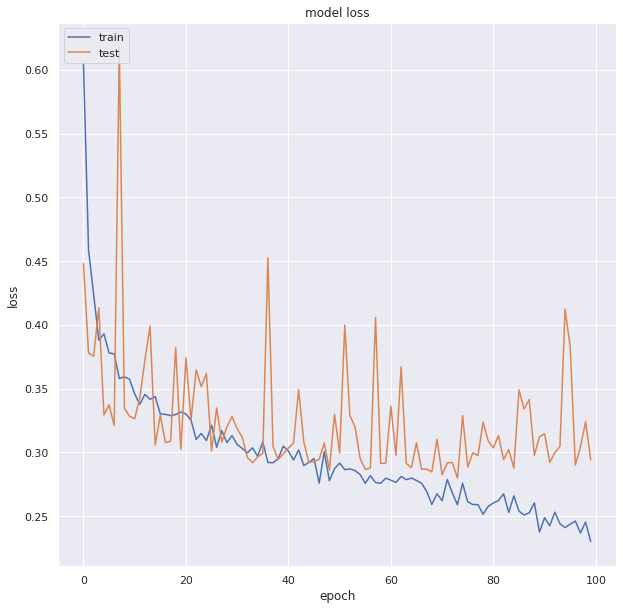

In [58]:
# plot the training loss and accuracy
H = history.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **Model training on a multiple worker**

https://keras.io/getting_started/faq/

https://stackoverflow.com/questions/57181551/can-i-write-a-keras-callback-that-records-and-returns-the-total-training-time/57182112

In [59]:
X_train_pp_df = DateTimeImputer().transform(X_train)
X_train_pp_df = DateDissolver(replace=True).transform(X_train_pp_df)
X_train_pp_df = text_pipeline.fit_transform(X_train_pp_df)

X_train_pp = full_pipeline.fit_transform(X_train_pp_df)


strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
with strategy.scope():
    # This could be any kind of model -- Functional, subclass...
    model_3 = keras.models.Sequential()
    model_3.add(keras.layers.Dense(5000 , activation="relu", input_shape=X_train_pp.shape[1:]))
    model_3.add(keras.layers.Dense(1000, activation="relu"))
    model_3.add(keras.layers.Dense(2000, activation="relu"))
    model_3.add(keras.layers.Dense(100, activation="relu"))
    model_3.add(keras.layers.Dense(500, activation="relu"))
    model_3.add(keras.layers.Dense(X_train_pp.shape[1], activation="relu"))
    model_3.add(keras.layers.Dense(1))

    model_3.compile(loss="mean_squared_logarithmic_error", optimizer=keras.optimizers.SGD(lr=1e-1))


INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0',), communication = CommunicationImplementation.AUTO


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [60]:
timeWorkers=[]
numberWorkers=[]
lossWorkers=[]

for i in range(0,40,2):
  cb = TimingCallback()
  history = model_3.fit(X_train_pp, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[cb], workers=i, use_multiprocessing=True)
  lossWorkers.append(history.history['loss'][99])
  timeWorkers.append(sum(cb.logs))
  numberWorkers.append(i)


Epoch 1/100
75/75 [==============================] - 4s 27ms/step - loss: 0.6148 - val_loss: 0.4403
Epoch 2/100
75/75 [==============================] - 1s 9ms/step - loss: 0.4408 - val_loss: 0.3772
Epoch 3/100
75/75 [==============================] - 1s 9ms/step - loss: 0.4155 - val_loss: 0.3583
Epoch 4/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3891 - val_loss: 0.3386
Epoch 5/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3735 - val_loss: 0.3663
Epoch 6/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3775 - val_loss: 0.3840
Epoch 7/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3625 - val_loss: 0.4303
Epoch 8/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3551 - val_loss: 0.3497
Epoch 9/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3504 - val_loss: 0.3193
Epoch 10/100
75/75 [==============================] - 1s 9ms/step - loss: 0.3482 - val_loss: 0.3259
Epoch 11

Text(0, 0.5, 'Time for training')

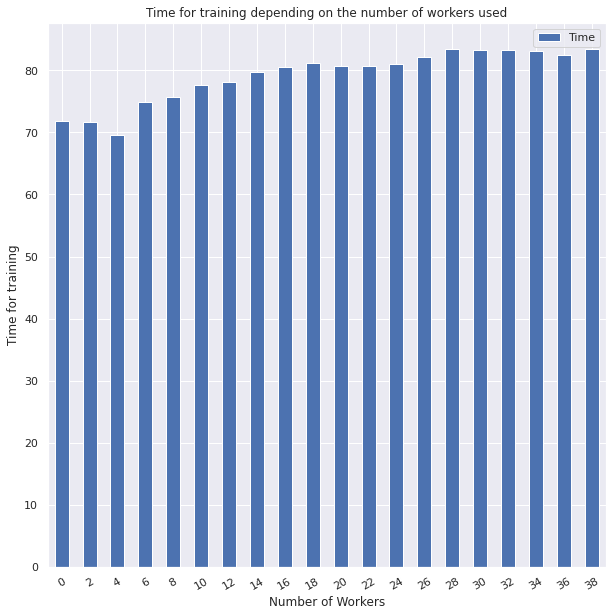

In [61]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame({'Time': timeWorkers}, index=numberWorkers)

plotdata.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Time for training depending on the number of workers used")
plt.xlabel("Number of Workers")
plt.ylabel("Time for training")

Text(0, 0.5, 'Loss per training')

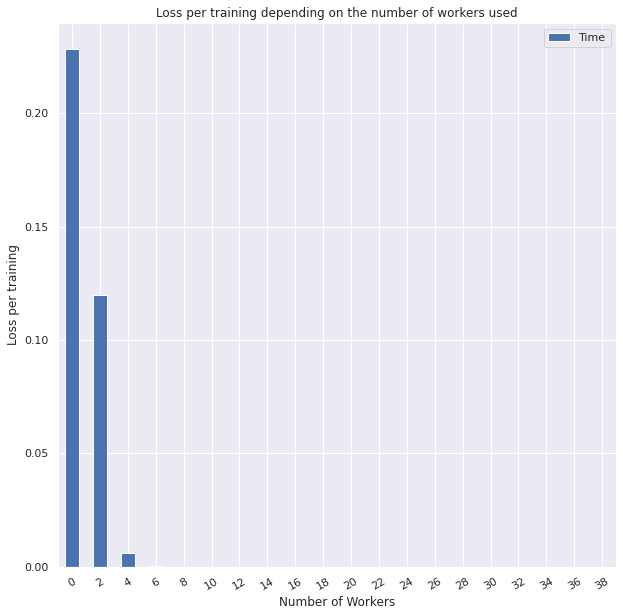

In [62]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame({'Time': lossWorkers}, index=numberWorkers)

plotdata.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Loss per training depending on the number of workers used")
plt.xlabel("Number of Workers")
plt.ylabel("Loss per training")

dict_keys(['loss', 'val_loss'])


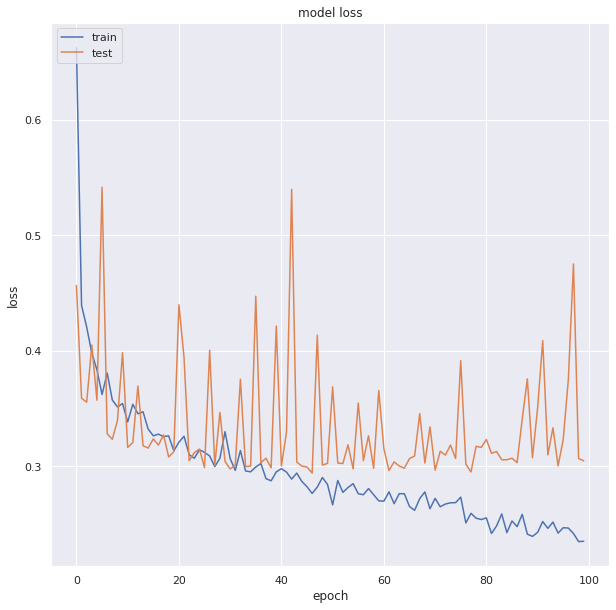

In [ ]:
print(history.history.keys())

# plot the training loss and accuracy
H = history.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Time depending on the number of data**

We reduce the number of data. Originally, we have 3000 data. We will divise per 2 this amount and observe the accuracy of the prediction and the influence on the time.

As well, I took into consideration the thrid model

In [64]:
timeData=[]
numberData=[]
lossData=[]

for i in range(10,3000,200):
  reducedData = X_train.head(i)

  X_train_reducedData_pp_df = DateTimeImputer().transform(reducedData)
  X_train_reducedData_pp_df = DateDissolver(replace=True).transform(X_train_reducedData_pp_df)
  X_train_reducedData_pp_df = text_pipeline.fit_transform(X_train_reducedData_pp_df)

  X_train_reducedData_pp = full_pipeline.fit_transform(X_train_reducedData_pp_df)

  model_3_reducedData = keras.models.Sequential()
  model_3_reducedData.add(keras.layers.Dense(5000 , activation="relu", input_shape=X_train_reducedData_pp.shape[1:]))
  model_3_reducedData.add(keras.layers.Dense(1000, activation="relu"))
  model_3_reducedData.add(keras.layers.Dense(2000, activation="relu"))
  model_3_reducedData.add(keras.layers.Dense(100, activation="relu"))
  model_3_reducedData.add(keras.layers.Dense(500, activation="relu"))
  model_3_reducedData.add(keras.layers.Dense(X_train_reducedData_pp.shape[1], activation="relu"))
  model_3_reducedData.add(keras.layers.Dense(1))

  model_3_reducedData.compile(loss="mean_squared_logarithmic_error", optimizer=keras.optimizers.SGD(lr=1e-1))

  cb = TimingCallback()
  history = model_3_reducedData.fit(X_train_reducedData_pp, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[cb])
  lossData.append(history.history['loss'][99])
  timeData.append(sum(cb.logs))
  numberData.append(i)
  
  
  


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 1s 676ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 3.9270 - val_loss: 3.6404
Epoch 11/100
1/1 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6/6 [==============================] - 1s 43ms/step - loss: 2.3869 - val_loss: 0.5040
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5551 - val_loss: 0.4741
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5262 - val_loss: 0.5418
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.5232 - val_loss: 0.4335
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4900 - val_loss: 0.4385
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4899 - val_loss: 0.4173
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4611 - val_loss: 0.4490
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4617 - val_loss: 0.4131
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4273 - val_loss: 0.4136
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4238 - val_loss: 0.4483
Epoch 11/100
6/6 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 1.7165 - val_loss: 0.5422
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5589 - val_loss: 0.4923
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 0.5362 - val_loss: 0.4976
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4977 - val_loss: 0.4464
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.4690 - val_loss: 0.4306
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4406 - val_loss: 0.3953
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3956 - val_loss: 0.7529
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4196 - val_loss: 0.4286
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 0.3608 - val_loss: 0.3349
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - loss: 0.3486 - val_loss: 0.3742
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 1.0902 - val_loss: 0.6625
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5244 - val_loss: 0.5777
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4717 - val_loss: 0.5066
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4236 - val_loss: 0.4373
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4540 - val_loss: 0.4339
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.3546 - val_loss: 0.5569
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.3712 - val_loss: 0.4555
Epoch 8/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3593 - val_loss: 0.4494
Epoch 9/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3332 - val_loss: 0.5270
Epoch 10/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3696 - val_loss: 0.4275
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
21/21 [==============================] - 1s 17ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 3/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 4/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 8/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 9/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 10/100
21/21 [==============================] - 0s 9ms/step - loss: 4.2980 - val_loss: 5.0136
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
26/26 [==============================] - 1s 18ms/step - loss: 0.8451 - val_loss: 0.5105
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.5051 - val_loss: 0.4667
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 0.4470 - val_loss: 0.4081
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.3972 - val_loss: 0.3784
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3817 - val_loss: 0.5113
Epoch 6/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3772 - val_loss: 0.3662
Epoch 7/100
26/26 [==============================] - 0s 8ms/step - loss: 0.3729 - val_loss: 0.3321
Epoch 8/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3484 - val_loss: 0.3678
Epoch 9/100
26/26 [==============================] - 0s 8ms/step - loss: 0.3398 - val_loss: 0.4786
Epoch 10/100
26/26 [==============================] - 0s 9ms/step - loss: 0.3656 - val_loss: 0.3463
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
31/31 [==============================] - 1s 14ms/step - loss: 0.7760 - val_loss: 0.4591
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 0.4783 - val_loss: 0.4763
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.4283 - val_loss: 0.3595
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3877 - val_loss: 0.3398
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 0.4053 - val_loss: 0.4753
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3583 - val_loss: 0.3077
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3545 - val_loss: 0.3030
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3558 - val_loss: 0.3054
Epoch 9/100
31/31 [==============================] - 0s 8ms/step - loss: 0.3373 - val_loss: 0.3599
Epoch 10/100
31/31 [==============================] - 0s 9ms/step - loss: 0.3389 - val_loss: 0.4169
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 1s 14ms/step - loss: 0.8360 - val_loss: 0.4382
Epoch 2/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4852 - val_loss: 0.3837
Epoch 3/100
36/36 [==============================] - 0s 9ms/step - loss: 0.4030 - val_loss: 0.4543
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4001 - val_loss: 0.3158
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3903 - val_loss: 0.3107
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3493 - val_loss: 0.4418
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3439 - val_loss: 0.3088
Epoch 8/100
36/36 [==============================] - 0s 9ms/step - loss: 0.3341 - val_loss: 0.4388
Epoch 9/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3361 - val_loss: 0.5026
Epoch 10/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3465 - val_loss: 0.4479
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
41/41 [==============================] - 1s 13ms/step - loss: 2.2201 - val_loss: 0.5726
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 0.4780 - val_loss: 0.4759
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.4050 - val_loss: 0.3884
Epoch 4/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3635 - val_loss: 0.8006
Epoch 5/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3820 - val_loss: 0.3690
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3462 - val_loss: 0.6971
Epoch 7/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3524 - val_loss: 0.3359
Epoch 8/100
41/41 [==============================] - 0s 9ms/step - loss: 0.3170 - val_loss: 0.3380
Epoch 9/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3270 - val_loss: 0.5081
Epoch 10/100
41/41 [==============================] - 0s 8ms/step - loss: 0.3220 - val_loss: 0.3916
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
46/46 [==============================] - 1s 11ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 7/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 8/100
46/46 [==============================] - 0s 9ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 9/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 10/100
46/46 [==============================] - 0s 8ms/step - loss: 4.4558 - val_loss: 4.3901
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
51/51 [==============================] - 1s 12ms/step - loss: 0.6797 - val_loss: 0.5855
Epoch 2/100
51/51 [==============================] - 0s 9ms/step - loss: 0.4513 - val_loss: 0.5274
Epoch 3/100
51/51 [==============================] - 0s 9ms/step - loss: 0.4143 - val_loss: 0.4416
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3959 - val_loss: 0.4297
Epoch 5/100
51/51 [==============================] - 0s 9ms/step - loss: 0.3826 - val_loss: 0.4089
Epoch 6/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3762 - val_loss: 0.4426
Epoch 7/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3662 - val_loss: 0.4105
Epoch 8/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3715 - val_loss: 0.3981
Epoch 9/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3544 - val_loss: 0.4842
Epoch 10/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3407 - val_loss: 0.3693
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
56/56 [==============================] - 1s 11ms/step - loss: 0.6442 - val_loss: 0.5869
Epoch 2/100
56/56 [==============================] - 0s 8ms/step - loss: 0.4629 - val_loss: 0.5107
Epoch 3/100
56/56 [==============================] - 0s 8ms/step - loss: 0.4286 - val_loss: 0.4485
Epoch 4/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3994 - val_loss: 0.3905
Epoch 5/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3906 - val_loss: 0.4500
Epoch 6/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3665 - val_loss: 0.6005
Epoch 7/100
56/56 [==============================] - 0s 9ms/step - loss: 0.3751 - val_loss: 0.3621
Epoch 8/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3713 - val_loss: 0.6503
Epoch 9/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3700 - val_loss: 0.5177
Epoch 10/100
56/56 [==============================] - 0s 8ms/step - loss: 0.3468 - val_loss: 0.4515
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
61/61 [==============================] - 1s 11ms/step - loss: 0.7818 - val_loss: 0.6903
Epoch 2/100
61/61 [==============================] - 0s 8ms/step - loss: 0.4706 - val_loss: 0.5824
Epoch 3/100
61/61 [==============================] - 0s 8ms/step - loss: 0.4481 - val_loss: 0.3762
Epoch 4/100
61/61 [==============================] - 1s 8ms/step - loss: 0.4087 - val_loss: 0.3614
Epoch 5/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3970 - val_loss: 0.3437
Epoch 6/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3970 - val_loss: 0.3490
Epoch 7/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3739 - val_loss: 0.8756
Epoch 8/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3702 - val_loss: 0.3661
Epoch 9/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3584 - val_loss: 0.3793
Epoch 10/100
61/61 [==============================] - 0s 8ms/step - loss: 0.3473 - val_loss: 0.4631
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
66/66 [==============================] - 1s 11ms/step - loss: 0.7500 - val_loss: 0.4938
Epoch 2/100
66/66 [==============================] - 1s 8ms/step - loss: 0.4636 - val_loss: 0.3692
Epoch 3/100
66/66 [==============================] - 1s 8ms/step - loss: 0.4259 - val_loss: 0.4336
Epoch 4/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3997 - val_loss: 0.6233
Epoch 5/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3876 - val_loss: 0.4728
Epoch 6/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3853 - val_loss: 0.4042
Epoch 7/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3662 - val_loss: 0.4108
Epoch 8/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3581 - val_loss: 0.3712
Epoch 9/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3602 - val_loss: 0.3321
Epoch 10/100
66/66 [==============================] - 1s 8ms/step - loss: 0.3564 - val_loss: 0.4363
Epoch 11

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
71/71 [==============================] - 1s 11ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 2/100
71/71 [==============================] - 1s 9ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 3/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 4/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 6/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 8/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 9/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 10/100
71/71 [==============================] - 1s 8ms/step - loss: 4.4131 - val_loss: 4.4129
Epoch 11

Text(0, 0.5, 'Time for training')

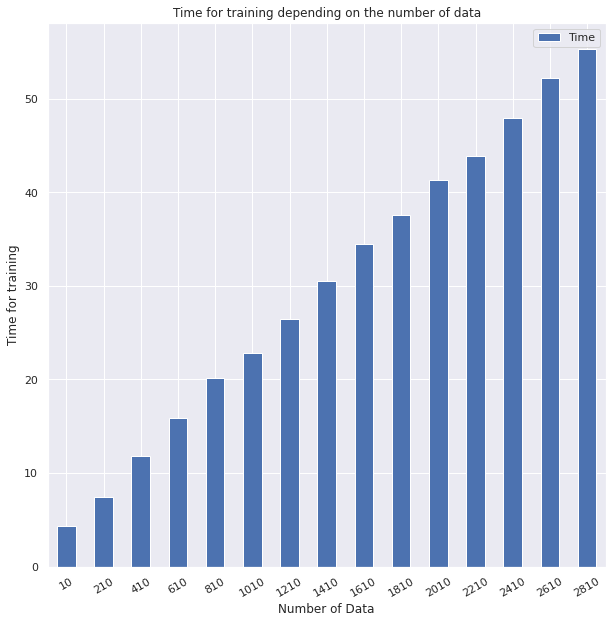

In [65]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame({'Time': timeData}, index=numberData)

plotdata.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Time for training depending on the number of data")
plt.xlabel("Number of Data")
plt.ylabel("Time for training")

Text(0, 0.5, 'Loss per training')

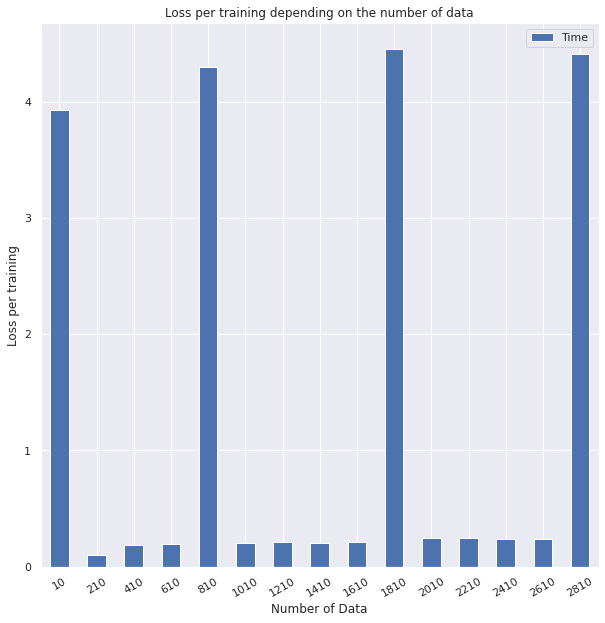

In [67]:
from matplotlib import pyplot as plt

plotdata = pd.DataFrame({'Time': lossData}, index=numberData)

plotdata.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Loss per training depending on the number of data")
plt.xlabel("Number of Data")
plt.ylabel("Loss per training")

**Prediction**

In [ ]:
X_test = test_set.copy().drop(test_set.filter(regex=COLUMN_EXCLUDE_PATTERN), axis=1)
print(X_test.info())
X_train_reducedData_pp_df = DateTimeImputer().transform(X_test)
X_train_reducedData_pp_df = DateDissolver(replace=True).transform(X_train_reducedData_pp_df)
X_train_reducedData_pp_df = text_pipeline.fit_transform(X_train_reducedData_pp_df)
print(X_train_reducedData_pp_df.info())

X_test_pp = full_pipeline.transform(X_train_reducedData_pp_df)
X_test_pp[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4398 non-null   int64  
 1   genres                4382 non-null   object 
 2   original_language     4398 non-null   object 
 3   original_title        4398 non-null   object 
 4   overview              4384 non-null   object 
 5   poster_path           4397 non-null   object 
 6   production_companies  4140 non-null   object 
 7   production_countries  4296 non-null   object 
 8   release_date          4397 non-null   object 
 9   runtime               4394 non-null   float64
 10  spoken_languages      4356 non-null   object 
 11  status                4396 non-null   object 
 12  title                 4395 non-null   object 
 13  Keywords              4005 non-null   object 
 14  cast                  4385 non-null   object 
 15  crew                 

array([-1.        ,  0.08928681,  0.24479855, -0.9023411 , -0.50164565,
        1.15028031, -1.        , -0.7199654 , -0.46745562, -0.73199577,
       -0.99990702, -0.19337976, -0.85518803, -0.91866334, -0.97161194,
       -0.27272727,  0.09090909, -0.13333333])

In [ ]:
from sklearn.metrics import mean_squared_log_error

final_model = model_3_reducedData
final_predictions = final_model.predict(X_test_pp)

In [ ]:
print("Predicts -> ", list(final_predictions[0:100]))

Predicts ->  [array([0.3077137], dtype=float32), array([0.33754382], dtype=float32), array([0.3725133], dtype=float32), array([0.3878379], dtype=float32), array([0.3013077], dtype=float32), array([0.34938195], dtype=float32), array([0.3424996], dtype=float32), array([0.36165622], dtype=float32), array([0.4028979], dtype=float32), array([4.093516], dtype=float32), array([0.30980983], dtype=float32), array([0.5442418], dtype=float32), array([0.36636046], dtype=float32), array([0.33193722], dtype=float32), array([0.3606242], dtype=float32), array([0.34477872], dtype=float32), array([0.53652453], dtype=float32), array([4.3433146], dtype=float32), array([0.45938867], dtype=float32), array([21.68166], dtype=float32), array([0.41335833], dtype=float32), array([0.53763914], dtype=float32), array([0.35566872], dtype=float32), array([0.38769513], dtype=float32), array([0.36700144], dtype=float32), array([0.41020694], dtype=float32), array([0.30537045], dtype=float32), array([0.3833501], dtype=fl

In [ ]:
test_set['popularity_predicted'] = final_predictions
test_set[['id', 'popularity']].to_csv('./sample_submission.csv', header=True, index=False)

In [ ]:
test_set[['id', 'original_title', 'popularity', 'popularity_predicted']].head(n = 50)

,id,original_title,popularity,popularity_predicted
0,3001,ディアルガVSパルキアVSダークライ,3.8515,0.3077
1,3002,Attack of the 50 Foot Woman,3.5598,0.3375
2,3003,Addicted to Love,8.0852,0.3725
3,3004,Incendies,8.5960,0.3878
4,3005,Inside Deep Throat,3.2177,0.3013
5,3006,SubUrbia,8.6793,0.3494
6,3007,Drei,4.8989,0.3425
7,3008,The Tigger Movie,7.0234,0.3617
8,3009,Becoming Jane,7.8297,0.4029
9,3010,Toy Story 2,17.5477,4.0935
